In [1]:
import sys
import pandas as pd

parent_dir = '/home/sei/tetrahedron_pair_ML'
sys.path.append(parent_dir)

n = 800000
tetrahedron_dataset = pd.read_csv('/home/sei/tetrahedron_pair_ML/data/processed/train/train_data.csv') # load only n, where n is the number of samples to 

def has_t2_columns(df):
    """Check if the dataframe contains T2 columns"""
    return any(col.startswith('T2_') for col in df.columns)

### Dataset Structure:

In [2]:
tetrahedron_dataset.head()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,...,T2_v2_y,T2_v2_z,T2_v3_x,T2_v3_y,T2_v3_z,T2_v4_x,T2_v4_y,T2_v4_z,IntersectionVolume,HasIntersection
0,0.278912,-0.260985,0.020300,-0.539873,-0.003892,0.101020,-0.101297,0.054500,-0.200246,0.362258,...,0.780288,-0.065052,-0.166169,0.598021,-0.339094,0.126675,0.413365,0.596514,0.0,0
1,-0.590877,-0.148723,-0.020137,-0.111791,0.257128,0.079507,0.435274,-0.179564,0.076633,0.267394,...,-0.192253,-0.177313,-0.262279,0.224615,-0.403897,0.012568,-0.487947,0.035431,0.0,0
2,0.033100,0.321599,-0.122896,-0.405874,0.116633,0.093513,-0.062018,-0.457384,-0.058870,0.434792,...,-0.672420,0.285401,-0.117921,-0.834037,0.299532,-0.596146,-0.225559,0.345605,0.0,0
3,0.201736,-0.212852,-0.013463,0.104719,0.234184,-0.019144,-0.346724,-0.049808,-0.008805,0.040269,...,0.482458,-0.021494,-0.069019,-0.026437,-0.119290,-0.106168,-0.239052,-0.027825,0.0,1
4,-0.109054,-0.107737,-0.037531,0.290204,0.146415,-0.015172,-0.518109,0.048191,0.020406,0.336959,...,0.356844,0.075746,-0.311207,0.015814,-0.130755,-0.629833,0.495951,-0.097373,0.0,0


- **Tetrahedrons:**
  - Each entry includes two tetrahedrons.
  - Each tetrahedron has four vertices.
  - Each vertex is defined by three coordinates (x, y, z).

- **Features:**
  - There are 12 features per tetrahedron, leading to 24 features total.
  - Column names follow the pattern `Tₜ_Vᵥ_α`, where:
    - `ₜ` = Tetrahedron number (1 or 2)
    - `ᵥ` = Vertex number (1 to 4)
    - `α` = Coordinate axis (x, y, or z)
  - Coordinates are normalized between 0 and 1.
  - Each coordinate is randomly generated through a i.i.d process.

- **Output Variables:**
  - **Intersection Status:**
    - Stored in the "intersection_status" column.
    - Values: `0` (no intersection) or `1` (intersection).
  - **Intersection Volume:**
    - Stored in the "intersection_volume" column.
    - Value is a non-negative real number.

### Input and Output Spaces:

- **Input Space:**
  - Represented as a vector in $\mathbb{R}^{24}$, where each coordinate is within the range $[0, 1]$.

- **Output Space:**
  - $\{0, 1\}$ for "HasIntersection".
  - $\mathbb{R}^{\geq 0}$ for "IntersectionVolume"

### Statistics


In [3]:
tetrahedron_dataset.describe()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,...,T2_v2_y,T2_v2_z,T2_v3_x,T2_v3_y,T2_v3_z,T2_v4_x,T2_v4_y,T2_v4_z,IntersectionVolume,HasIntersection
count,739000.000000,739000.000000,739000.000000,739000.000000,739000.000000,739000.000000,739000.000000,739000.000000,739000.000000,739000.000000,...,739000.000000,7.390000e+05,739000.000000,739000.000000,739000.000000,739000.000000,739000.000000,739000.000000,739000.000000,739000.000000
mean,0.000265,-0.000425,0.000025,-0.000433,0.000050,0.000037,0.000555,-0.000035,0.000044,-0.000387,...,0.000325,-9.060227e-05,-0.000345,0.000345,0.000574,-0.000367,-0.000097,0.000372,1461.426892,0.534506
std,0.369370,0.217738,0.090028,0.369335,0.217908,0.090178,0.369297,0.217792,0.090070,0.366159,...,0.319877,3.076910e-01,0.311053,0.317346,0.307984,0.305548,0.313199,0.313768,2758.095071,0.498808
min,-1.035543,-0.715028,-0.555219,-1.036317,-0.731886,-0.528937,-1.018338,-0.746468,-0.563361,-1.005454,...,-1.233539,-1.187990e+00,-1.193575,-1.191319,-1.112098,-1.157781,-1.182042,-1.235163,0.000000,0.000000
25%,-0.314412,-0.162005,-0.043434,-0.314807,-0.161790,-0.043424,-0.314144,-0.161720,-0.043333,-0.311228,...,-0.229538,-1.919395e-01,-0.227703,-0.226281,-0.192688,-0.221924,-0.221749,-0.206070,0.000000,0.000000
50%,0.000072,-0.000424,0.000012,-0.000878,-0.000037,0.000005,-0.000124,-0.000264,0.000009,-0.000459,...,0.000249,2.654269e-08,-0.000417,0.000073,0.000136,-0.000651,-0.000241,0.000483,0.000000,1.000000
75%,0.315525,0.161219,0.043532,0.314163,0.161828,0.043527,0.315408,0.161885,0.043588,0.310986,...,0.230509,1.916979e-01,0.227833,0.227047,0.194395,0.220935,0.221848,0.206459,1447.391129,1.000000
max,1.026182,0.713936,0.537718,1.009104,0.764151,0.555367,1.019591,0.741769,0.560511,1.011144,...,1.163642,1.236360e+00,1.146355,1.195014,1.219539,1.225615,1.165297,1.225152,9999.988745,1.000000


#### Class Balance

In [4]:
total_entries = len(tetrahedron_dataset)
status_0_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 0].shape[0]
status_1_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 1].shape[0]

percentage_status_0 = (status_0_count / total_entries) * 100
percentage_status_1 = (status_1_count / total_entries) * 100

print(f"Percentage of entries with HasIntersection = 0: {percentage_status_0:.2f}%")
print(f"Percentage of entries with HasIntersection = 1: {percentage_status_1:.2f}%")

Percentage of entries with HasIntersection = 0: 46.55%
Percentage of entries with HasIntersection = 1: 53.45%


#### Coordinates precision

In [5]:
# Extract all coordinate columns
coordinate_columns = [col for col in tetrahedron_dataset.columns if '_v' in col]

def calculate_precision(value):
    value_str = str(value)
    if '.' in value_str:
        return len(value_str.split('.')[1])
    else:
        return 0

max_precision = 0
min_precision = float('inf')

for col in coordinate_columns:
    col_precision = tetrahedron_dataset[col].map(calculate_precision)
    max_precision = max(max_precision, col_precision.max())
    min_precision = min(min_precision, col_precision.min())

print(f"Min coordinate precision in the dataset: {min_precision} decimal places")
print(f"Max coordinate precision in the dataset: {max_precision} decimal places")

Min coordinate precision in the dataset: 1 decimal places
Max coordinate precision in the dataset: 12 decimal places


#### Coordinates distribution

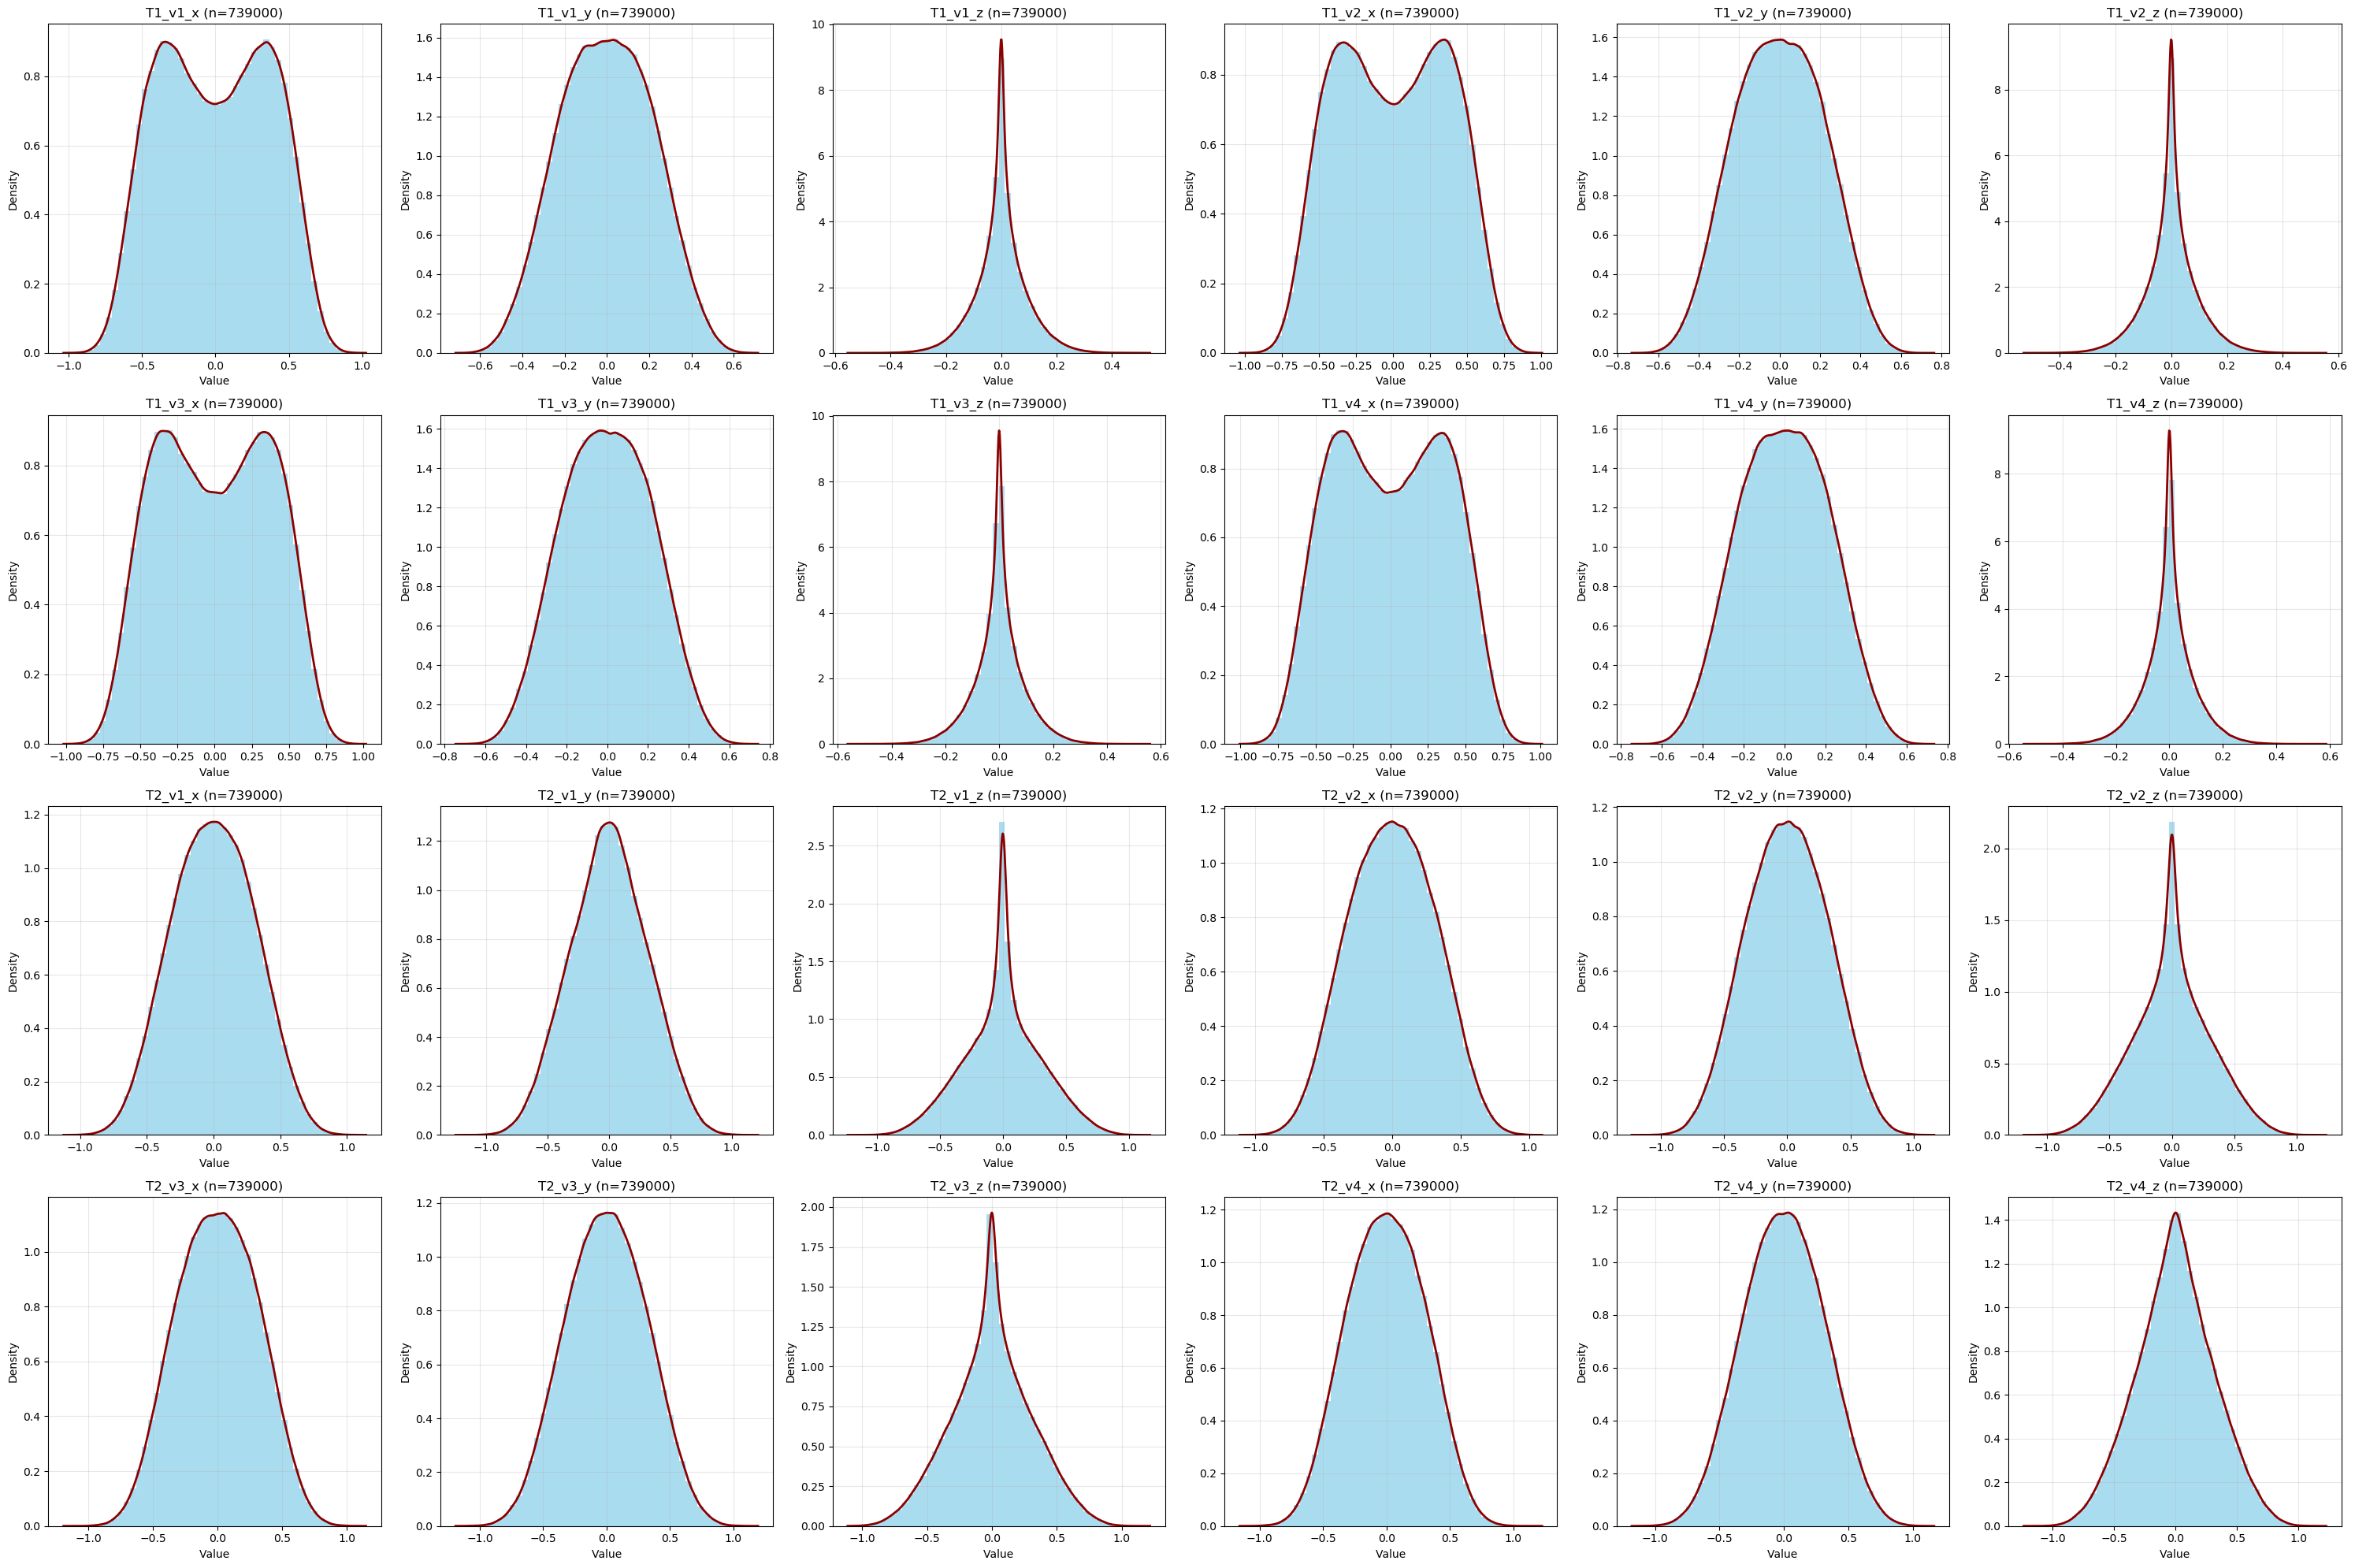

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy.stats import gaussian_kde

# Define tetrahedrons, points, and coordinates
tetrahedrons = ['T1']
if has_t2_columns(tetrahedron_dataset):
    tetrahedrons.append('T2')
points = ['v1', 'v2', 'v3', 'v4']
coordinates = ['x', 'y', 'z']

# Build the list of column names in the order: T1_v1_x, T1_v1_y, T1_v1_z, ..., T2_v4_z
columns = [f'{tetra}_{point}_{coord}' for tetra in tetrahedrons for point in points for coord in coordinates]

# Adjust your subplot layout based on number of columns
ncols = min(6, len(columns))
nrows = (len(columns) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows))
axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]  # Handle single plot case


for ax, col in zip(axes, columns):
    # Extract the data for the current column from the DataFrame
    data = np.ravel(tetrahedron_dataset[col].to_numpy(copy=False))
    
    # Plot the histogram (normalized to density)
    ax.hist(data, bins=50, color='skyblue', density=True, alpha=0.7)
    
    # Compute and plot the Kernel Density Estimate
    kde = gaussian_kde(data)
    x_vals = np.linspace(data.min(), data.max(), 500)
    ax.plot(x_vals, kde(x_vals), color='darkred', lw=2)
    
    # Formatting
    ax.set_title(f'{col} (n={len(data)})', fontsize=12)
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#### Tetrahedron volume distribution

In [7]:
### Get Data ###
import src.GeometryUtils as gu


def extract_t1_vertices(row):
    return torch.tensor([
        [row['T1_v1_x'], row['T1_v1_y'], row['T1_v1_z']],
        [row['T1_v2_x'], row['T1_v2_y'], row['T1_v2_z']],
        [row['T1_v3_x'], row['T1_v3_y'], row['T1_v3_z']],
        [row['T1_v4_x'], row['T1_v4_y'], row['T1_v4_z']]
    ])

def extract_t2_vertices(row):
    return torch.tensor([
        [row['T2_v1_x'], row['T2_v1_y'], row['T2_v1_z']],
        [row['T2_v2_x'], row['T2_v2_y'], row['T2_v2_z']],
        [row['T2_v3_x'], row['T2_v3_y'], row['T2_v3_z']],
        [row['T2_v4_x'], row['T2_v4_y'], row['T2_v4_z']]
    ])

t1_volumes = []
t2_volumes = []

for _, row in tetrahedron_dataset.iterrows():
    t1_vertices = extract_t1_vertices(row)
    volume = gu.calculate_tetrahedron_volume(t1_vertices)
    t1_volumes.append(volume.item())
    
    if has_t2_columns(tetrahedron_dataset):
        t2_vertices = extract_t2_vertices(row)
        volume = gu.calculate_tetrahedron_volume(t2_vertices)
        t2_volumes.append(volume.item())

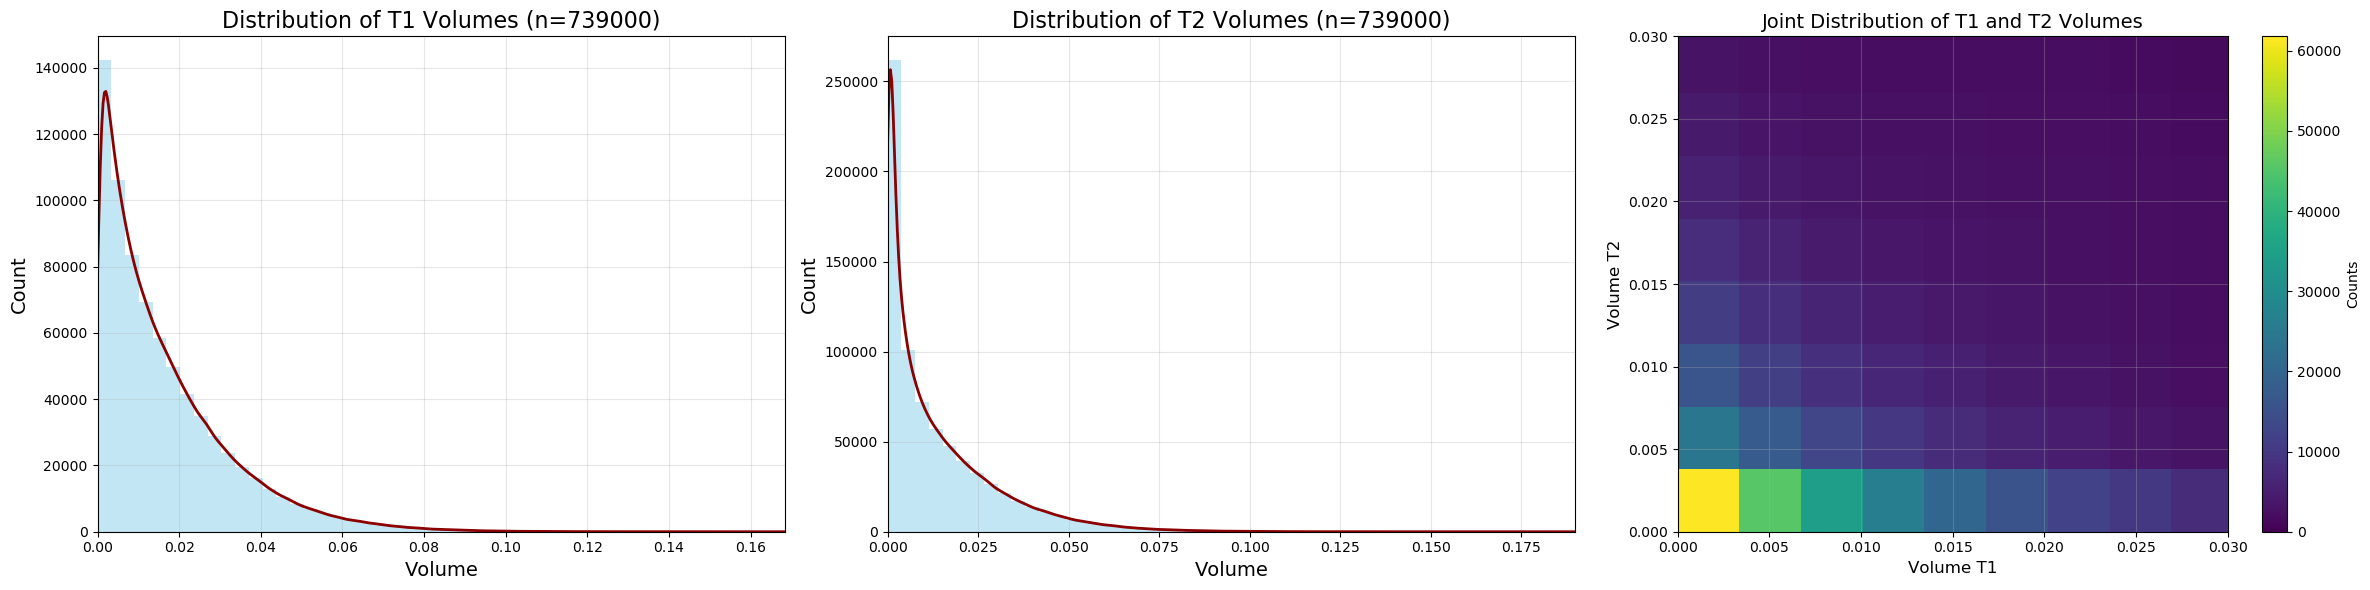

In [15]:
volumes_t1 = np.array(t1_volumes).ravel()
volumes_t2 = np.array(t2_volumes).ravel()

if has_t2_columns(tetrahedron_dataset):
    # Create two subplots (original code)
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))

    # Plot for T1
    counts, bins, _ = axes[0].hist(volumes_t1, bins=50, color='skyblue', alpha=0.5)
    kde = gaussian_kde(volumes_t1)
    x = np.linspace(volumes_t1.min(), volumes_t1.max(), 500)
    axes[0].plot(x, kde(x) * len(volumes_t1) * (bins[1] - bins[0]), color='darkred', lw=2)
    axes[0].set_title(f'Distribution of T1 Volumes (n={len(volumes_t1)})', fontsize=16)
    axes[0].set_xlabel('Volume', fontsize=14)
    axes[0].set_ylabel('Count', fontsize=14)
    axes[0].set_xlim(0, volumes_t1.max())
    axes[0].grid(True, alpha=0.3)

    # Plot for T2
    counts, bins, _ = axes[1].hist(volumes_t2, bins=50, color='skyblue', alpha=0.5)
    kde = gaussian_kde(volumes_t2)
    x = np.linspace(volumes_t2.min(), volumes_t2.max(), 500)
    axes[1].plot(x, kde(x) * len(volumes_t2) * (bins[1] - bins[0]), color='darkred', lw=2)
    axes[1].set_title(f'Distribution of T2 Volumes (n={len(volumes_t2)})', fontsize=16)
    axes[1].set_xlabel('Volume', fontsize=14)
    axes[1].set_ylabel('Count', fontsize=14)
    axes[1].set_xlim(0, volumes_t2.max())
    axes[1].grid(True, alpha=0.3)


    # --- Joint Distribution Plot (Manual using np.histogram2d + pcolormesh) ---
    hist2d_bins = 50
    # FIX: Calculate histogram using NumPy directly
    # Avoid density/normed arguments for compatibility
    H, xedges, yedges = np.histogram2d(volumes_t1, volumes_t2, bins=hist2d_bins)

    # Transpose H because pcolormesh expects (Y, X) dimensions
    H = H.T

    X, Y = np.meshgrid(xedges, yedges)
    pcm = axes[2].pcolormesh(X, Y, H, cmap='viridis', shading='auto')
    axes[2].set_title('Joint Distribution of T1 and T2 Volumes', fontsize=14)
    axes[2].set_xlabel('Volume T1', fontsize=12)
    axes[2].set_ylabel('Volume T2', fontsize=12)
    axes[2].set_xlim(0, 0.03) 
    axes[2].set_ylim(0, 0.03) 

    fig.colorbar(pcm, ax=axes[2], label='Counts')
    axes[2].grid(True, alpha=0.3)

else:
    # Create a single plot for T1 only
    fig, ax = plt.subplots(figsize=(10, 6))
    counts, bins, _ = ax.hist(volumes_t1, bins=50, color='skyblue', alpha=0.5)

    # Plot for T1
    counts, bins, _ = axes[0].hist(volumes_t1, bins=50, color='skyblue', alpha=0.5)
    kde = gaussian_kde(volumes_t1)
    x = np.linspace(-0.05, 0.015, 100)
    axes[0].plot(x, kde(x) * len(volumes_t1) * (bins[1] - bins[0]), color='darkred', lw=2)
    axes[0].set_title(f'Distribution of T1 Volumes (n={len(volumes_t1)})', fontsize=16)
    axes[0].set_xlabel('Volume', fontsize=14)
    axes[0].set_ylabel('Count', fontsize=14)
    axes[0].set_xlim(-0.05, 0.015)
    axes[0].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#### Intersection volume distribution

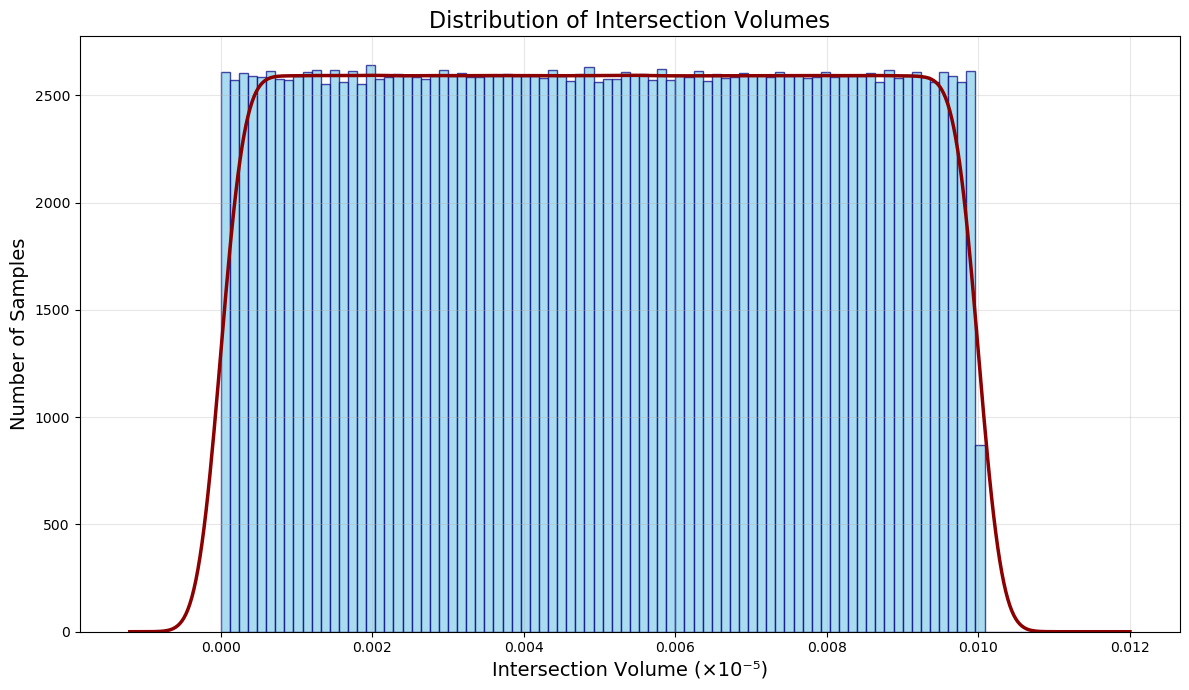

In [ ]:
intersecting_cases = tetrahedron_dataset[tetrahedron_dataset['IntersectionVolume'] > 0]

# Calculate appropriate range from data
scaling_factor = 100000000  # Processing applies a scaling factor of 10^5
volumes = intersecting_cases['IntersectionVolume'].to_numpy() / scaling_factor
max_vol = 0.012
n_bins = 100  # More bins for better resolution

plt.figure(figsize=(12, 7))

# Use actual counts
counts, bins, _ = plt.hist(volumes, 
                           bins=n_bins,
                           range=(0, max_vol),
                           color='skyblue',
                           edgecolor='navy', 
                           alpha=0.7)

# Properly scaled KDE with many more points
kde = gaussian_kde(volumes)
x = np.linspace(-0.0012, max_vol, 500)  # 500 points for smooth curve
bin_width = bins[1] - bins[0]
plt.plot(x, kde(x) * len(volumes) * bin_width,
         color='darkred', 
         lw=2.5)

plt.title(f'Distribution of Intersection Volumes', fontsize=16)
plt.xlabel(f'Intersection Volume (×10⁻⁵)', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()